In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/customer_data.csv')

In [ ]:
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [ ]:
low_risk=df[df["label"]==0]
high_risk=df[df["label"]==1]
frac=len(high_risk)/float(len(low_risk))
frac

0.25

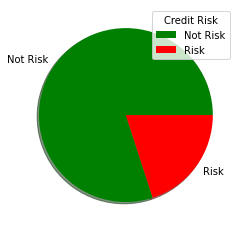

In [ ]:
plt.pie(cust_df["label"].value_counts(),labels = ["Not Risk","Risk"],colors = ["g","r"],shadow = True)
plt.legend(title ="Credit Risk")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y=df["label"]
x=df.copy()
x.drop(columns=["label"],inplace=True)
x.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
# predictions
y_pred =forest_model.predict(X_test)
print(y_pred)

[0.13 0.53 0.3  0.33 0.84 0.19 0.83 0.01 0.52 0.66 0.95 0.71 0.99 0.68
 0.08 0.84 0.2  0.97 0.72 0.19 0.68 0.22 0.29 0.9  0.45 0.44 0.98 0.03
 0.87 0.42 0.92 0.66 0.18 0.68 0.89 0.78 0.37 0.26 0.74 0.11 0.34 0.79
 0.62 0.38 0.96 0.35 0.68 0.12 0.19 0.28 0.27 0.42 0.12 0.13 0.99 0.66
 0.99 0.29 0.78 0.26 0.8  0.27 0.67 0.5  0.7  0.31 0.97 0.28 0.14 0.11
 0.5  0.52 0.34 0.28 0.45 0.04 0.83 0.15 0.2  0.45 0.51 0.75 0.91 0.88
 0.29 0.14 0.07 0.9  0.14 0.3  0.31 0.12 0.03 0.15 0.9  0.32 0.98 0.14
 0.97 0.28 0.49 0.21 0.35 0.05 0.68 0.98 1.   0.17 0.88 0.38 0.83 0.84
 0.17 0.89 0.07 0.86 0.48 0.98 0.31 0.94 0.21 0.97 0.89 0.78 0.07 0.11
 0.2  0.35 0.35 0.13 0.2  0.13 0.53 0.39 0.55 0.36 0.08 0.97 0.97 0.27
 0.47 0.99 0.11 0.44 0.27 0.19 0.13 0.95 0.16 0.19 0.89 0.47 0.17 0.98
 0.86 0.67 1.   0.5  0.3  0.12 0.12 0.39 0.78 0.09 0.3  0.16 0.4  0.19
 0.3  0.11 1.   0.99 0.96 0.34 0.34 0.31 0.64 0.71 0.5  0.86 0.81 0.88
 0.92 0.9  0.7  0.34 0.41 0.96 0.97 0.96 0.4  0.85 0.99 0.64 0.56 0.19
 0.23 

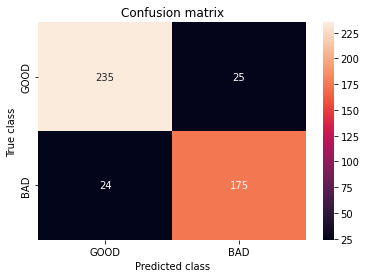

In [ ]:
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

235 transacciones no tienen un riesgo alto, un 174 si tiene un riesgo alto